In [16]:
# Import PmagPy modules
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag

import matplotlib.pyplot as plt # our plotting buddy
import numpy as np

import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS

In [44]:
def plot_mag_map(element, lons, lats, element_type, cmap='coolwarm', lon_0=0, date="", contours=False, proj='PlateCarree', min=False,max=False):
    """
    makes a color contour map of geomagnetic field element

    Parameters
    ____________
    fignum : matplotlib figure number
    element : field element array from pmag.do_mag_map for plotting
    lons : longitude array from pmag.do_mag_map for plotting
    lats : latitude array from pmag.do_mag_map for plotting
    element_type : [B,Br,I,D] geomagnetic element type
        B : field intensity
        Br : radial field intensity
        I : inclinations
        D : declinations
    Optional
    _________
    contours : plot the contour lines on top of the heat map if True
    proj : cartopy projection ['PlateCarree','Mollweide']
           NB: The Mollweide projection can only be reliably with cartopy=0.17.0; otherwise use lon_0=0.  Also, for declinations, PlateCarree is recommended.
    cmap : matplotlib color map - see https://matplotlib.org/examples/color/colormaps_reference.html for options
    lon_0 : central longitude of the Mollweide projection
    date : date used for field evaluation,
           if custom ghfile was used, supply filename
    min : int
        minimum value for color contour on intensity map : default is minimum value  - useful for making many maps with same scale
    max : int
        maximum value for color contour on intensity map : default is maximum value - useful for making many maps with same scale

    Effects
    ______________
    plots a color contour map with  the desired field element
    """

    from matplotlib import cm
    if lon_0 == 180:
        lon_0 = 179.99
    if lon_0 > 180:
        lon_0 = lon_0-360.
    lincr = 1
    if type(date) != str:
        date = str(date)

    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=lon_0))


    xx, yy = np.meshgrid(lons, lats)
    levmax = 5*round(element.max()/5)+5
    levmin = 5*round(element.min()/5)-5
    if element_type == 'Br' or element_type == 'B':
        v=np.arange(min,max+5,5)
        if min and max:
            plt.contourf(xx, yy, element,v,
                     vmin=min,vmax=max,
                     cmap=cmap, transform=ccrs.PlateCarree())
        else:
            plt.contourf(xx, yy, element,v,
                     levels=np.arange(levmin, levmax, 1),
                     cmap=cmap, transform=ccrs.PlateCarree())
#        cbar = plt.colorbar(orientation='horizontal')
        if contours:
            plt.contour(xx, yy, element, levels=np.arange(levmin, levmax, 10),
                        colors='black', transform=ccrs.PlateCarree())

#        if element_type == 'Br':
#            plt.title('Radial field strength ($\mu$T): '+date)
#        else:
#            plt.title('Total field strength ($\mu$T): '+date)
    if element_type == 'I':
        plt.contourf(xx, yy, element,
                     levels=np.arange(-90, 90, lincr),
                     cmap=cmap, transform=ccrs.PlateCarree())
#        cbar = plt.colorbar(orientation='horizontal')
        if contours:
            plt.contour(xx, yy, element, levels=np.arange(-80, 90, 10),
                        colors='black', transform=ccrs.PlateCarree())
#        plt.title('Field inclination: '+date)
    if element_type == 'D':
        plt.contourf(xx, yy, element,
                     levels=np.arange(-180, 180, 10),
                     cmap=cmap, transform=ccrs.PlateCarree())
#        cbar = plt.colorbar(orientation='horizontal')
        if contours:
            plt.contour(xx, yy, element, levels=np.arange(-180, 180, 10),
                        colors='black', transform=ccrs.PlateCarree())
#        plt.title('Field declination: '+date)
    ax.coastlines()
    ax.set_global()
    return ax

In [45]:
# define some useful parameters
date,mod,lon_0,alt,ghfile=2019,'cals10k.2',0,0,"" # only date is required
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)

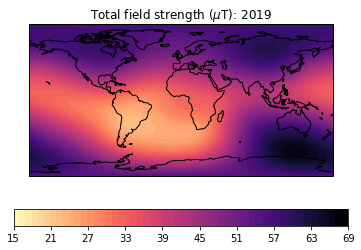

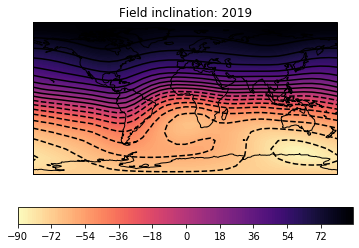

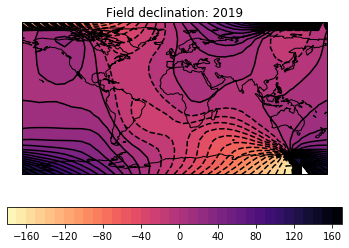

In [46]:
cmap='magma_r' # nice color map for contourf
pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',cmap=cmap,date=date,proj='PlateCarree',contours=False) # plot the field strength
pmagplotlib.plot_mag_map(2,Is,lons,lats,'I',cmap=cmap,date=date,proj='PlateCarree',contours=True)# plot the inclination
pmagplotlib.plot_mag_map(3,Ds,lons,lats,'D',cmap=cmap,date=date,contours=True);# plot the declination    

In [47]:
fig_sequence = 1
fig_sequence += 1
fig_sequence

2

In [ ]:
dir_path = './mag_maps'
fig_sequence = 1

for date in range(-1000,2000,50):
    Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)
    plot_mag_map(Bs,lons,lats,'B',cmap='magma_r',date=date,proj='PlateCarree',contours=False)
    plt.text(0,0,str(date),color='white',fontsize=50)
    plt.savefig(dir_path+'/' + 'map_map' + '_' + str(fig_sequence) +'.png',bbox_inches = 'tight',
    pad_inches = 0)
    plt.cla()
    fig_sequence += 1 

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

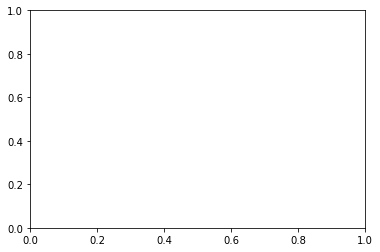

In [20]:
directory = './mag_maps'
mod,lon_0,alt,ghfile='cals10k.2',0,0,"" #
cmap,title='jet','Intensity' # nice color map for contourf
fignum=1
dates=range(-1000,2100,500) # make maps for these years.  
# to make a high resolution, smooth movie, uncomment this line
#dates=range(-1000,2100,50) # make maps for these years.  
lon_0=0 # center the maps at the Greenwich meridian
element='B' # let's do field strength

for date in dates:  # step through the loop

    Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)
    plot_mag_map(fignum,Bs,lons,lats,'B',cmap=cmap,date=date,proj='PlateCaree',
                             min=15,max=100,contours=False) # plot the field strength
    figstr=str(fignum)
    while len(figstr)<4:figstr='0'+figstr
    
    plt.savefig(dir_path+'/' +title.strip()+'_'+figstr+'.png') # saves the  figure. to a folder
    fignum+=1
    print ('figure saved as: ',title.strip()+'_'+figstr+'.png')